In [5]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt 
pd.set_option('display.max_rows', 100)

In [126]:
df  = pd.read_csv('training.csv')

In [127]:
df.shape

(8238, 24)

In [128]:
df.head(3)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,2,999,0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999.0,0,no,NaN,1
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,35,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,999.0,0,no,NaN,2
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,999.0,0,no,NaN,3


## Avg. Profit 

In [94]:
df[~df['profit'].isna()]['profit'].mean()

172.11206896551724

In [9]:
df['responded'].value_counts()

no     7310
yes     928
Name: responded, dtype: int64

## Converting yes/no to 1/0

In [10]:
df['target'] = df['responded'].apply(lambda x: 1 if x == 'yes' else 0)

In [11]:
df.drop('responded',axis=1,inplace=True)


## Descriptive Stats

In [12]:
df['target'].value_counts()

0    7310
1     928
Name: target, dtype: int64

In [13]:
df['target'].value_counts(normalize=True)

0    0.887351
1    0.112649
Name: target, dtype: float64

In [14]:
df.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,profit,id,target
count,6224.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,928.000000,8238.000000,8238.000000
mean,39.953728,2.531682,960.916606,0.183054,0.056397,93.570977,-40.577907,3.586929,5165.575965,960.687436,0.365501,172.112069,4119.500000,0.112649
std,10.540516,2.709773,190.695054,0.514209,1.566550,0.578782,4.650101,1.742784,72.727423,191.841012,1.294101,128.999186,2378.250092,0.316182
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,-276.000000,1.000000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000,124.000000,2060.250000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000,170.000000,4119.500000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000,213.250000,6178.750000,0.000000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,25.000000,515.000000,8238.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         6224 non-null   float64
 1   profession      8238 non-null   object 
 2   marital         8238 non-null   object 
 3   schooling       5832 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     7451 non-null   object 
 10  campaign        8238 non-null   int64  
 11  pdays           8238 non-null   int64  
 12  previous        8238 non-null   int64  
 13  poutcome        8238 non-null   object 
 14  emp.var.rate    8238 non-null   float64
 15  cons.price.idx  8238 non-null   float64
 16  cons.conf.idx   8238 non-null   float64
 17  euribor3m       8238 non-null   f

In [16]:
df.isnull().sum().sort_values(ascending = False)

profit            7310
schooling         2406
custAge           2014
day_of_week        787
campaign             0
profession           0
marital              0
default              0
housing              0
loan                 0
contact              0
month                0
target               0
id                   0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
pdays                0
dtype: int64

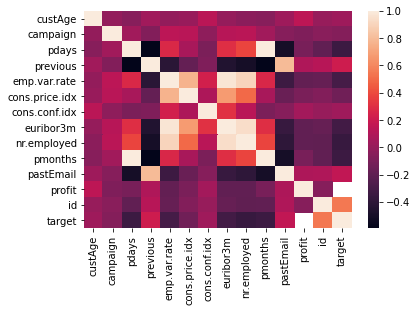

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [18]:
corr

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,profit,id,target
custAge,1.000000,-0.003293,-0.046927,0.047157,-0.003919,0.014048,0.139191,0.002702,-0.036146,-0.046907,0.033321,0.148883,0.009704,0.030529
campaign,-0.003293,1.000000,0.043170,-0.067156,0.144846,0.131177,-0.022511,0.126954,0.137529,0.043156,-0.050854,-0.075853,-0.040301,-0.061270
pdays,-0.046927,0.043170,1.000000,-0.591426,0.272676,0.071599,-0.088312,0.300028,0.381316,0.999992,-0.503876,-0.102455,-0.189173,-0.338593
previous,0.047157,-0.067156,-0.591426,1.000000,-0.412068,-0.180294,-0.076815,-0.450641,-0.504011,-0.591439,0.799061,0.094548,0.127639,0.215147
emp.var.rate,-0.003919,0.144846,0.272676,-0.412068,1.000000,0.766178,0.234569,0.971495,0.901478,0.272602,-0.332596,-0.186664,-0.169001,-0.302932
cons.price.idx,0.014048,0.131177,0.071599,-0.180294,0.766178,1.000000,0.087312,0.675538,0.498278,0.071356,-0.157092,-0.097575,-0.068667,-0.133069
cons.conf.idx,0.139191,-0.022511,-0.088312,-0.076815,0.234569,0.087312,1.000000,0.312890,0.134930,-0.088209,-0.054076,0.050431,0.011338,0.036926
euribor3m,0.002702,0.126954,0.300028,-0.450641,0.971495,0.675538,0.312890,1.000000,0.942894,0.300052,-0.357731,-0.191713,-0.174173,-0.314339
nr.employed,-0.036146,0.137529,0.381316,-0.504011,0.901478,0.498278,0.134930,0.942894,1.000000,0.381430,-0.394005,-0.189686,-0.199313,-0.358877
pmonths,-0.046907,0.043156,0.999992,-0.591439,0.272602,0.071356,-0.088209,0.300052,0.381430,1.000000,-0.503813,-0.102407,-0.189188,-0.338647


In [19]:
df.dtypes

custAge           float64
profession         object
marital            object
schooling          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pmonths           float64
pastEmail           int64
profit            float64
id                  int64
target              int64
dtype: object

In [20]:
df['profession'].value_counts()

admin.           2102
blue-collar      1847
technician       1351
services          792
management        583
retired           337
entrepreneur      314
self-employed     279
housemaid         213
unemployed        190
student           159
unknown            71
Name: profession, dtype: int64

## Data transformation
## Convert categorical values to numeric using label encoder


In [21]:
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

# Encoding the categorical variable
fit = df.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    df[i] = d[i].transform(df[i].fillna('NA'))

In [22]:
df.head(3)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,profit,id,target
0,34.0,0,2,7,0,0,2,0,0,5,2,999,0,1,-1.8,93.075,-47.1,1.498,5099.1,999.0,0,NaN,1,0
1,31.0,7,2,4,0,0,0,0,3,3,35,999,0,1,1.4,93.918,-42.7,4.968,5228.1,999.0,0,NaN,2,0
2,NaN,0,2,4,0,0,0,1,4,0,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1,999.0,0,NaN,3,0


In [23]:
df['profession'].value_counts()

0     2102
1     1847
9     1351
7      792
4      583
5      337
2      314
6      279
3      213
10     190
8      159
11      71
Name: profession, dtype: int64

In [24]:
features = df[df.columns.difference(['target','id','profit'])]
labels = df['target']


In [25]:
features = features.fillna(0)

## WOE and IV

In [26]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [27]:
final_iv, IV = data_vars(df[df.columns.difference(['target','id','profit'])],df.target)

C:\Users\nahar\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,campaign,1.000,2.000000,5701,691.0,0.121207,5010.0,0.878793,0.744612,0.685363,0.082915,1.727438e-02
1,campaign,3.000,40.000000,2537,237.0,0.093417,2300.0,0.906583,0.255388,0.314637,-0.208637,1.727438e-02
2,cons.conf.idx,-50.800,-41.800000,4711,422.0,0.089578,4289.0,0.910422,0.454741,0.586731,-0.254837,7.021783e-02
3,cons.conf.idx,-40.800,-26.900000,3527,506.0,0.143465,3021.0,0.856535,0.545259,0.413269,0.277160,7.021783e-02
4,cons.price.idx,92.201,93.444000,4170,571.0,0.136930,3599.0,0.863070,0.615302,0.492339,0.222945,6.151797e-02
5,cons.price.idx,93.749,94.767000,4068,357.0,0.087758,3711.0,0.912242,0.384698,0.507661,-0.277354,6.151797e-02
6,contact,0.000,0.000000,5243,772.0,0.147244,4471.0,0.852756,0.831897,0.611628,0.307584,2.522006e-01
7,contact,1.000,1.000000,2995,156.0,0.052087,2839.0,0.947913,0.168103,0.388372,-0.837384,2.522006e-01
8,custAge,18.000,38.000000,3247,375.0,0.115491,2872.0,0.884509,0.404095,0.392886,0.028129,5.854581e-03
9,custAge,39.000,94.000000,2977,307.0,0.103124,2670.0,0.896876,0.330819,0.365253,-0.099019,5.854581e-03


In [29]:
IV = IV.rename(columns={'VAR_NAME':'index'})
IV.sort_values(['IV'],ascending=0)


,index,IV
8,euribor3m,6.446984e-01
16,pmonths,5.990103e-01
17,poutcome,5.680657e-01
13,nr.employed,4.027449e-01
7,emp.var.rate,3.027378e-01
3,contact,2.522006e-01
18,previous,2.031551e-01
14,pastEmail,1.707074e-01
1,cons.conf.idx,7.021783e-02
2,cons.price.idx,6.151797e-02


In [30]:
## VIF to eliminate correlated features

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [33]:
## Taking featues with IV > 0.1

In [34]:
features = features[list(IV[IV['IV'] >= 0.1]['index'])]

In [35]:
vif = calculate_vif(features)

In [36]:
vif

,Features,VIF
0,contact,1.891234
1,emp.var.rate,18.695969
2,euribor3m,108.121680
3,nr.employed,430.955376
4,pastEmail,3.005594
5,pmonths,153.289826
6,poutcome,30.376266
7,previous,7.362085


In [37]:
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)

In [38]:
vif

,Features,VIF
0,contact,1.875843
1,emp.var.rate,1.373811
2,pastEmail,2.995878
3,pmonths,4.634577
4,poutcome,4.442272
5,previous,3.251081


In [39]:
list(vif['Features'])


['contact', 'emp.var.rate', 'pastEmail', 'pmonths', 'poutcome', 'previous']

In [40]:
final_vars = list(vif['Features']) + ['target']
df1 = df[final_vars].fillna(0)
df1.describe()

,contact,emp.var.rate,pastEmail,pmonths,poutcome,previous,target
count,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000
mean,0.363559,0.056397,0.365501,960.687436,0.925710,0.183054,0.112649
std,0.481053,1.566550,1.294101,191.841012,0.370801,0.514209,0.316182
min,0.000000,-3.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-1.800000,0.000000,999.000000,1.000000,0.000000,0.000000
50%,0.000000,1.100000,0.000000,999.000000,1.000000,0.000000,0.000000
75%,1.000000,1.400000,0.000000,999.000000,1.000000,0.000000,0.000000
max,1.000000,1.400000,25.000000,999.000000,2.000000,6.000000,1.000000


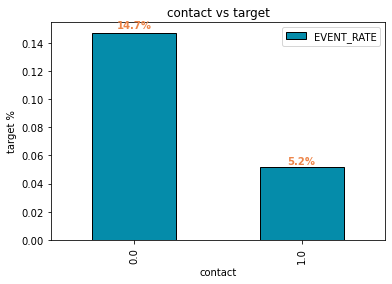

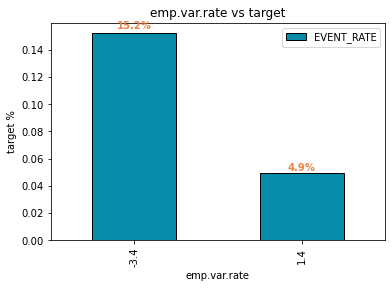

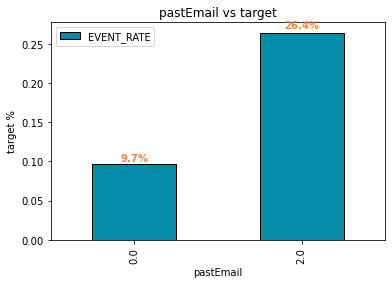

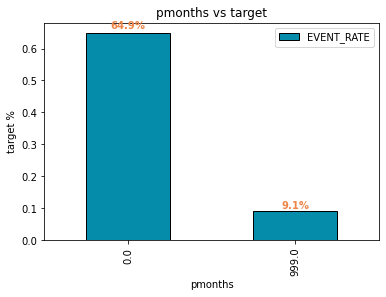

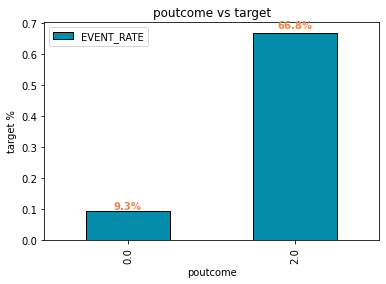

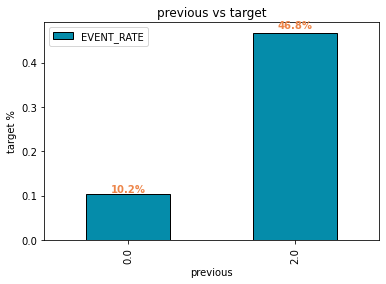

In [41]:
bar_color = '#058caa'
num_color = '#ed8549'

final_iv,_ = data_vars(df1,df1['target'])
final_iv = final_iv[(final_iv.VAR_NAME != 'target')]
grouped = final_iv.groupby(['VAR_NAME'])
for key, group in grouped:
    ax = group.plot('MIN_VALUE','EVENT_RATE',kind='bar',color=bar_color,linewidth=1.0,edgecolor=['black'])
    ax.set_title(str(key) + " vs " + str('target'))
    ax.set_xlabel(key)
    ax.set_ylabel(str('target') + " %")
    rects = ax.patches
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*height, str(round(height*100,1)) + '%', 
                ha='center', va='bottom', color=num_color, fontweight='bold')

## Building model

In [47]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, test_size = 0.4)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

features_train = train[list(vif['Features'])]
label_train = train['target']
features_test = test[list(vif['Features'])]
label_test = test['target']

## Logistic Regression Model

In [129]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [136]:
# Create and fit a logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=200)
model.fit(features_train,label_train)

# Predict probabilities for the train set
y_probs = model.predict_proba(features_train)[:, 1]  # Probability of class 1



thresholds = np.arange(0.1, 1.0, 0.1)

# Calculate F1 scores for each threshold
f1_scores = []
recall = []
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    f1 = f1_score(label_train, y_pred)
    f1_scores.append(f1)
    recall_t = recall_score(label_train, y_pred)
    recall.append(recall_t)
    

# Print F1 scores for different thresholds
for threshold, f1 in zip(thresholds, f1_scores):
    print(f"Threshold: {threshold:.1f}, F1 Score: {f1:.3f}")

for threshold, r1 in zip(thresholds, recall):
    print(f"Threshold: {threshold:.1f}, Recall Score: {r1:.3f}")

Threshold: 0.1, F1 Score: 0.368
Threshold: 0.2, F1 Score: 0.411
Threshold: 0.3, F1 Score: 0.370
Threshold: 0.4, F1 Score: 0.316
Threshold: 0.5, F1 Score: 0.297
Threshold: 0.6, F1 Score: 0.272
Threshold: 0.7, F1 Score: 0.181
Threshold: 0.8, F1 Score: 0.077
Threshold: 0.9, F1 Score: 0.000
Threshold: 0.1, Recall Score: 0.718
Threshold: 0.2, Recall Score: 0.362
Threshold: 0.3, Recall Score: 0.269
Threshold: 0.4, Recall Score: 0.210
Threshold: 0.5, Recall Score: 0.193
Threshold: 0.6, Recall Score: 0.171
Threshold: 0.7, Recall Score: 0.104
Threshold: 0.8, Recall Score: 0.041
Threshold: 0.9, Recall Score: 0.000


In [137]:
# Set your custom threshold (e.g., 0.2)
custom_threshold = 0.2
y_pred = (y_probs >= custom_threshold).astype(int)

# Evaluate the model's performance
print("Confusion Matrix:")
#print(confusion_matrix(label_train, y_pred))
print("Accuracy:", accuracy_score(label_train, y_pred))
print("Precision:", precision_score(label_train, y_pred))
print("Recall:", recall_score(label_train, y_pred))
print("F1 Score:", f1_score(label_train, y_pred))


Confusion Matrix:
Accuracy: 0.886685552407932
Precision: 0.4744525547445255
Recall: 0.36178107606679033
F1 Score: 0.41052631578947363


## Confusion Matrix

In [138]:
pd.crosstab(label_train,pd.Series(y_pred),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,4187,216
1,344,195


In [139]:
195*172 - (195+216)*30

21210

In [140]:
#model = LogisticRegression(solver='lbfgs', max_iter=200)
#model.fit(features_test,label_test)

# Predict probabilities for the train set
y_probs_test = model.predict_proba(features_test)[:, 1]  # Probability of class 1

# Set your custom threshold (e.g., 0.2)
custom_threshold = 0.2
y_pred_test = (y_probs_test >= custom_threshold).astype(int)

# Evaluate the model's performance
print("Confusion Matrix:")
#print(confusion_matrix(label_train, y_pred))
print("Accuracy:", accuracy_score(label_test, y_pred_test))
print("Precision:", precision_score(label_test, y_pred_test))
print("Recall:", recall_score(label_test, y_pred_test))
print("F1 Score:", f1_score(label_test, y_pred_test))

Confusion Matrix:
Accuracy: 0.881371359223301
Precision: 0.4963768115942029
Recall: 0.35218508997429304
F1 Score: 0.41203007518796986


In [141]:
pd.crosstab(label_test,pd.Series(y_pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,2768,139
1,252,137


## Test data

In [148]:
137*172 - (137+139)*30

15284

In [143]:
Testing = pd.read_csv('testingCandidate.csv')

In [144]:
Testing.sample(3)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
3340,58.0,blue-collar,married,NaN,unknown,no,no,cellular,aug,wed,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,999.0,0,3341
28360,24.0,student,single,NaN,no,no,no,cellular,jun,wed,6,6,1,success,-1.7,94.055,-39.8,0.727,4991.6,0.2,0,28361
15833,25.0,admin.,single,university.degree,no,yes,yes,cellular,may,tue,2,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,999.0,0,15834


In [145]:
Testing = Testing.set_index('id')

In [146]:
Testing.sample(3)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
id,,,,,,,,,,,,,,,,,,,,,
5350,39.0,blue-collar,single,basic.4y,unknown,no,no,telephone,jul,fri,24,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,999.0,0
15525,NaN,blue-collar,single,NaN,no,yes,no,cellular,apr,fri,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,999.0,0
3126,75.0,retired,married,university.degree,no,yes,no,cellular,jul,thu,1,999,2,failure,-1.7,94.215,-40.3,0.810,4991.6,999.0,2


In [147]:
#Testing['target'] = Testing['responded'].apply(lambda x: 1 if x == 'yes' else 0)

In [121]:
final_vars

['contact',
 'emp.var.rate',
 'pastEmail',
 'pmonths',
 'poutcome',
 'previous',
 'target']

In [122]:
list(vif['Features'])
testing_sample_features = Testing[list(vif['Features'])]

In [125]:
testing_sample_features.sample(3)

,contact,emp.var.rate,pastEmail,pmonths,poutcome,previous
id,,,,,,
15551,cellular,-1.8,0,999.0,nonexistent,0
9705,cellular,1.4,0,999.0,nonexistent,0
12724,cellular,-1.7,0,999.0,nonexistent,0


In [150]:
## Converting categorical variables to encoding
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

# Encoding the categorical variable
fit = testing_sample_features.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    testing_sample_features[i] = d[i].transform(testing_sample_features[i].fillna('NA'))

<ipython-input-150-54de72c58b8e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_sample_features[i] = d[i].transform(testing_sample_features[i].fillna('NA'))
<ipython-input-150-54de72c58b8e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_sample_features[i] = d[i].transform(testing_sample_features[i].fillna('NA'))


In [151]:
testing_sample_features.sample(3)

,contact,emp.var.rate,pastEmail,pmonths,poutcome,previous
id,,,,,,
16615,1,1.4,0,999.0,1,0
7364,1,-0.1,0,999.0,1,0
1420,0,-2.9,2,999.0,0,1


In [152]:
# Predict probabilities for the train set
y_probs_test_2 = model.predict_proba(testing_sample_features)[:, 1]  # Probability of class 1

# Set your custom threshold (e.g., 0.2)
custom_threshold = 0.2
y_pred_test_2 = (y_probs_test_2 >= custom_threshold).astype(int)

In [160]:
y_probs_test_2

array([0.08671923, 0.83154289, 0.11665235, ..., 0.18997127, 0.03246501,
       0.20288088])

In [159]:
y_pred_test_2

array([0, 1, 0, ..., 0, 0, 1])

In [156]:
testing_sample_features['target']=y_pred_test_2

<ipython-input-156-7b938be0b75b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_sample_features['target']=y_pred_test_2


In [157]:
testing_sample_features.sample(3)

,contact,emp.var.rate,pastEmail,pmonths,poutcome,previous,target
id,,,,,,,
16963,0,1.4,0,999.0,1,0,0
17927,0,1.4,0,999.0,1,0,0
24643,1,1.4,0,999.0,1,0,0


In [158]:
testing_sample_features['target'].value_counts()

0    30137
1     2813
Name: target, dtype: int64

In [161]:
2813/(2813+30137)

0.08537177541729894

In [162]:
testing_sample_features.to_csv('testing_sample_features_target.csv')